In [92]:
# Data from https://data.europa.eu/data/datasets/211dd3ed-3dd8-4ff9-ab82-38c76f6a7dd2?locale=en

import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

df = pd.read_csv('~/Documents/Presentations/seaborn_tutorial/datasets/Vaccination situation 2016/data.gov.ro/Vaccinations trim1-3 2016-2.csv', sep=';""')
df = df.stack().str.replace('"', '').unstack()
df.columns = df.columns.str.replace('"', '')
df["Numar vaccinati"] = df["Numar vaccinati"].astype(int)

dfnv = df.groupby('Judet').agg({'Numar vaccinati': 'sum'})
dfvt = df.groupby('Vaccin').agg({'Numar vaccinati': 'sum'})
dftm = df.groupby('Trimestru').agg({'Numar vaccinati': 'sum'})
dfnv.reset_index(inplace=True)
dfvt.reset_index(inplace=True)
dfvt

/tmp/ipykernel_11266/3421738956.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('~/Documents/Presentations/seaborn_tutorial/datasets/Vaccination situation 2016/data.gov.ro/Vaccinations trim1-3 2016-2.csv', sep=';""')


,Vaccin,Numar vaccinati
0,Avaxim,306
1,BCG ( Alt produs ),126883
2,BCG - Cantacuzino,15544
3,DTCoq,35278
4,DTVax,7862
5,Diftavax,81445
6,Engerix B,28098
7,Euvax,157196
8,Fluarix,27
9,HEXACIMA,4592


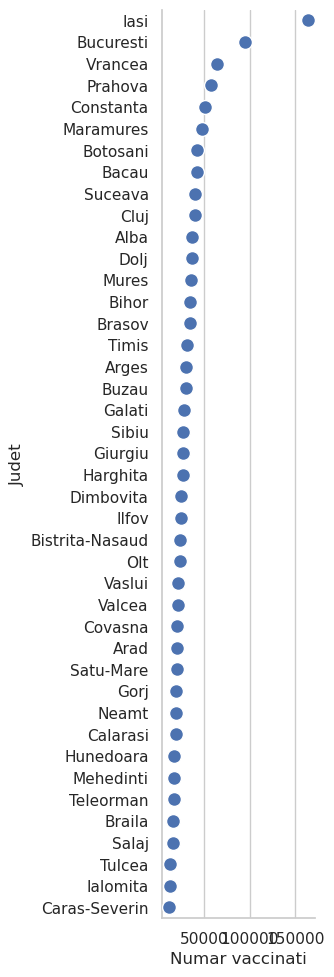

In [94]:
g = sns.PairGrid(dfnv.sort_values("Numar vaccinati", ascending=False),
                 x_vars=df.columns[3], y_vars=["Judet"], height=10, aspect=.25)

g.map(sns.stripplot, size=10, orient="h", jitter=False, palette="flare_r", linewidth=1, edgecolor="w")

In [42]:
df

,Judet,Localitate,Vaccin,Numar vaccinati,Trimestru,An
0,Alba,Abrud,BCG ( Alt produs ),16,1,2016
1,Alba,Abrud,BCG - Cantacuzino,14,1,2016
2,Alba,Abrud,DTCoq,27,1,2016
3,Alba,Abrud,DTVax,4,1,2016
4,Alba,Abrud,Engerix B,20,1,2016
...,...,...,...,...,...,...
149632,Vrancea,Vulturu,Priorix,44,3,2016
149633,Vrancea,Vulturu,Tetraxim,1,3,2016
149634,Vrancea,Vulturu,Trimovax,24,3,2016
149635,Vrancea,Vulturu,Tritanrix,18,3,2016
